# 線形モデル

## 線形モデルによる回帰

In [5]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
%matplotlib inline

線形モデルによる一般的な予測式。    
wとbは学習されたモデルのパラメータ。    

$$\hat{y} = w[0] \times x[0] \times w[1] \times x[1] ... w[p] \times x[p] + b$$

損失関数

$$E(w) = \sum_{i=1}^{n} (yi- \hat{yi})^2$$

w[0]: 0.393906  b: -0.031804


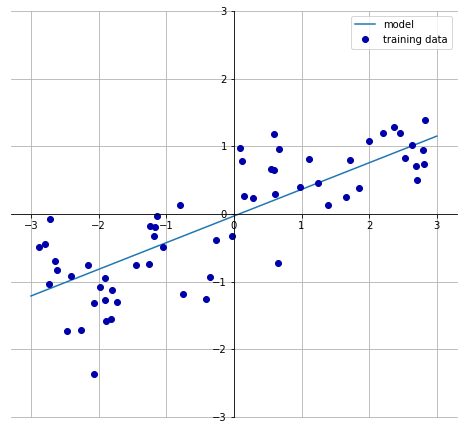

In [5]:
import mglearn
import matplotlib.pyplot as plt

mglearn.plots.plot_linear_regression_wave()
plt.show()

KNNに比べると直線で予測するのは制約が強すぎると感じるかもしれない。    
ターゲットのyが線形和で表すことができるという仮定を置いていいる。     
１次元データの場合は歪んで見えるが、多次元の特徴量を持つ場合に線形モデルは非常に強力。    

## 線形回帰(通常最小二乗法)

通常最小二乗法(OLS)は最も単純で最も古典的な線形回帰手法。    
線形回帰ではターゲットyとの平均２乗誤差が最小になるように、パラメータwとbを求める。

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_wave(n_samples=60)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [17]:
# w: 傾きを表すパラメータ: 重み, 係数
print("lr.coef_: {}".format(lr.coef_))
# y: 切片
print("lr.intercept_: {}".format(lr.intercept_))

#scikitlearnではユーザーが設定してないパラメータはintercept_などアンダースコアがついてる。

lr.coef_: [ 0.39390555]
lr.intercept_: -0.031804343026759746


In [18]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


学習スコアはそこまで良くないが、テストスコアと似てる。    
１次元データの場合はモデルが非常に単純なので過剰適合の危険は少ない。    
高次元のデータの場合は線形モデルはより強力になるために、過剰適合の可能性が高くなる。    

In [19]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [35]:
X.shape

(506, 104)

高次元をグラフ化するとこうなっちゃう。

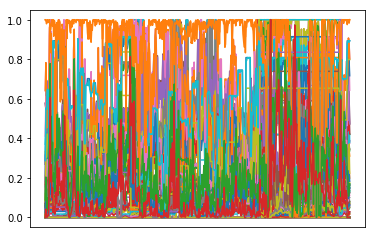

In [55]:
import pandas as pd
df = pd.DataFrame(X)
plt.plot(df)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

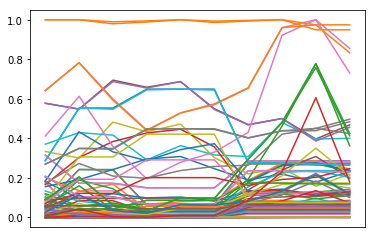

In [56]:
import pandas as pd
df = pd.DataFrame(X[:10])
plt.plot(df)
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom='off',      # ticks along the bottom edge are off
    top='off',         # ticks along the top edge are off
    labelbottom='off') # labels along the bottom edge are off

In [20]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.95
Test set score: 0.61


訓練スコアとテストスコアの性能が大きくなるのは過剰適合の兆候。    
複雑度を制御できるモデルを探さなければならない。    
標準的な線形回帰に代わる最も一般的な手法はリッジ回帰だ。

## リッジ回帰(線形回帰にL2正則化を施したもの)

リッジ回帰は線形モデルの回帰の一つ。    
予測に用いられる式は通常の最小二乗法のものと同じ。    
係数(w)を訓練データに対する予測だけでなく、他の制約に対しても最適化する。    
係数の絶対値の大きさを可能な限り小さくしたい。    
つまりwの要素をなるべく0に近くしたい。直感的には予測をうまく行いつつ、個々の特徴量が出力に与える影響をなるべく少なくする（傾きを小さくしたい）    
この制約条件は正則化の一例。正則化とは過剰適合と防ぐために明示的にモデルを制約すること。    
リッジ回帰で用いられている正則化はL2正則化と呼ばれる。

In [21]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


結果を見るとLinearRegressionよりテストスコアが高い。    
これは期待通りで、過剰適合していたのをL2正則化で抑えた。    
複雑度の低いモデルは、訓練データに対する性能は低いが汎化性能は高い。    
alphaパラメータを用いてモデルの簡潔さと訓練データに対する性能がトレードオフになる。    

In [22]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


alphaを小さくすると係数の制約は小さくなる。

In [23]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


In [26]:
ridge.coef_[:3]

array([-1.45195306, -1.55625501, -1.45850339])

正則化の影響を見る方法としてcoef_がある。    
正則化(alpha)を強くした方が中心に集まってる。

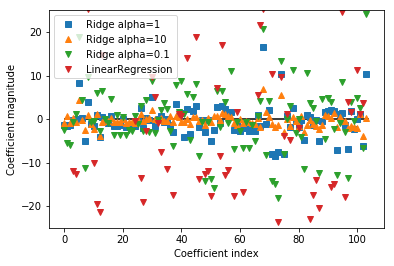

In [25]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'v', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()
plt.show()

もう一つの正則化の影響を見る方法としてalphaを固定して訓練データ量を変えて見る。    
図はリッジ回帰と線形回帰の学習曲線。    
十分なデータ量があるときは正則化は不要に見える。    


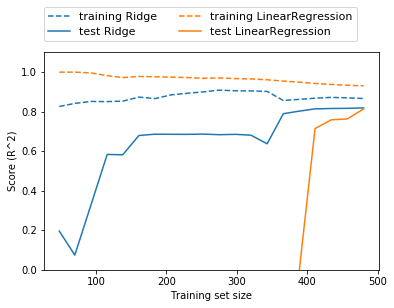

In [57]:
mglearn.plots.plot_ridge_n_samples()
plt.show()

### まとめ

リッジ回帰は正則化されているため、訓練スコアは線形回帰より低い。
しかしリッジ回帰はテストスコアでは線形回帰より高い。

訓練データが沢山あれば、リッジ回帰も線形回帰も同じ性能を示す。

## Lasso回帰(線形回帰にL1正則化を施したもの)

幾つかの特徴量が無視される

Ridgeに代わる線形回帰としてLassoがある。    
L1正則化を使う。L1正則化の結果、いくつかの係数が完全に0になる。    
どの特徴量が重要なのか明らかになる。

In [58]:
from sklearn.linear_model import Lasso
import numpy as np

lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


適合不足。４つの特徴しか使ってないのでalphaを減らす。

In [60]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [61]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


実際に使う場合はRidgeを使うと良い。特徴量が多くて重要なものがわずかしかない予測がされる場合はLassoの方が解釈しやすいモデルが得られる。

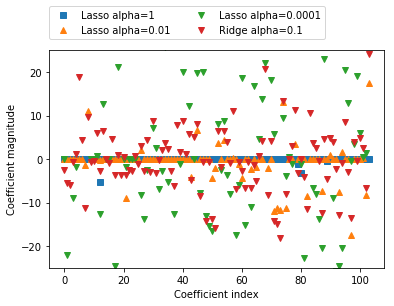

In [62]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")

plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.show()

# ElasticNet

LassoとRidgeのペナルティを組み合わせたクラス。L1とL2のパラメータを調整する必要がある。

In [66]:
from sklearn.linear_model import ElasticNet
import numpy as np

elastic = ElasticNet().fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic.coef_ != 0)))

Training set score: 0.33
Test set score: 0.22
Number of features used: 38


In [67]:
elastic = ElasticNet(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(elastic.score(X_train, y_train)))
print("Test set score: {:.2f}".format(elastic.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(elastic.coef_ != 0)))

Training set score: 0.86
Test set score: 0.72
Number of features used: 84


## クラス分類の為の線形モデル

線形モデルはクラス分類にも使われている。    
予測式

$$\hat{y} = w[0] \times x[0] \times w[1] \times x[1] ... w[p] \times x[p] + b > 0$$

線形回帰と似ているが予測された値が0をお超えるかどうかで分類している。

### ロジスティック回帰とSVM

決定境界の上と下でクラスが違う。

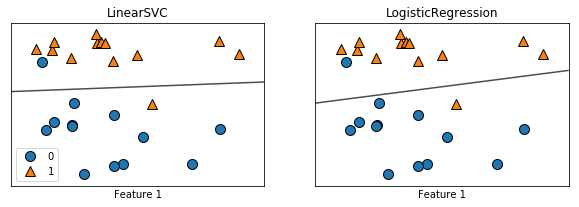

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC # 線形サポートベクタマシン

X, y = mglearn.datasets.make_forge()

fig, axes = plt.subplots(1, 2, figsize=(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_xlabel("Feature 1")
    
axes[0].legend()
plt.show()

上記二つのモデルはデフォルトでは，L２正則化を行う．

LogisticRegression, LinearSVCにおける正則化の強度を決定するパラメータはC．

Cが大きくなると正則化が弱くなる．
```
Cが大: 訓練データに対しての適合度をあげようとする
Cが小: 係数ベクトル(w)を小さくしようとする
```

Cが大きいと個々のデータへの適合度を上げようとする。

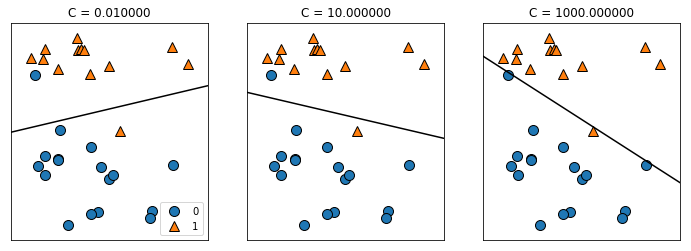

In [72]:
mglearn.plots.plot_linear_svc_regularization()
plt.show()

回帰と同様に線形モデルによるクラス分類は低次元においては制約が強すぎるように感じる。    
決定平面が直線や平面にしかならないからだ。    
しかし高次元の場合は線形モデルによるクラス分類は強力なので、特徴量の数が多い場合には過剰適合を回避する方法が重要になる。

In [73]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.955
Test set score: 0.958


訓練セットとテストセットの値がかなり近い=> 適合不足の可能性が高い

In [76]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.974
Test set score: 0.965


Cの適応度をあげると学習スコアの精度が上がってる。

In [77]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


Cの適応度を下げると正則化が強くなる。

C=0.01の係数が一番中心によっており、小さい値になっている。

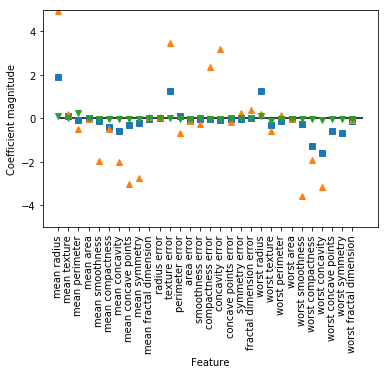

In [78]:
plt.plot(logreg.coef_.T, 's', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.01")

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.show()

Training accuracy of l1 logreg with C0.001: 0.91
Test accuracy of l1 logreg with C0.001: 0.92
Training accuracy of l1 logreg with C1.000: 0.96
Test accuracy of l1 logreg with C1.000: 0.96
Training accuracy of l1 logreg with C100.000: 0.99
Test accuracy of l1 logreg with C100.000: 0.98


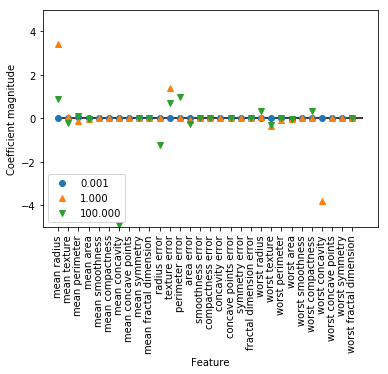

In [47]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C{:.3f}: {:.2f}".format(C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C{:.3f}: {:.2f}".format(C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="{:.3f}".format(C))
    
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)
plt.show()

## 線形モデルによる他クラス分類

多くの線形モデルはニクラス分離にしか適用できない（ロジスティック回帰を除いて）

ニクラス分類アルゴリズムを多クラス分類アルゴリズムにて拡張する方法として`一対その他`アプローチがある．    
クラスがたくさんある場合は２クラス分類を何度も行う。    
１クラスにつき１つの２クラス分類器があるので、クラスごとに係数ベクトル(w)と切片（b）がある。    


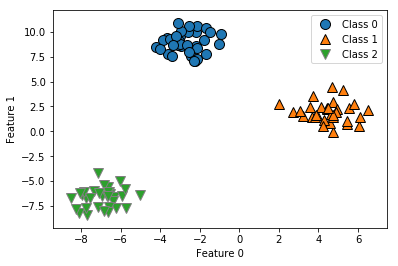

In [79]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[: ,1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])
plt.show()

In [80]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape: ", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


真ん中の三角の部分は「その他」になる。

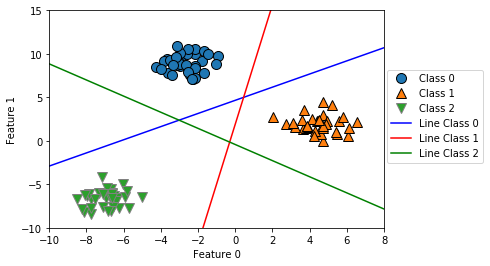

In [82]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))
plt.show()

真ん中の三角部分にデータがプロットされた場合は一番線に近いクラスになる。

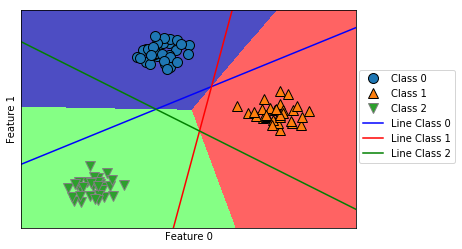

In [53]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)

for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, ['b', 'r', 'g']):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)

plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1', 'Line Class 2'], loc=(1.01, 0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### 線形モデルの利点, 欠点, パラメータ

- パラメータ

```
正則化パラメータ
線形モデル: alpha, LinearSVC, LinearRegression: C
alphaが大きいとき, Cが小さい場合は単純なモデルに対応する．
両方とも対数スケールで値を変更する
```
- 正則化

L1正則化を使うか, L2正則化を使うか

```
一部の特徴が重要だと思う場合はL1正則化，　それ以外はL2正則化
```

- 利点

    - 線形モデルは訓練，予測ともに高速．サンプル数が10万~100万点のデータに対しては，LinearRegression,Ridgeにsolver='sag'オプションを用いると高速になる場合がある．
    - 予測手法が理解しやすい
    - 特徴量の数がサンプル数の個数よりも多いときに性能を発揮する
    
- 欠点

    - 係数の意味を理解するのが難しい
    - 特にデータセット中に強く相関した特徴量がある場合わかりにくい。

### アルゴリズムのまとめ

- 線形回帰
- Ridge回帰: 線形回帰にL2正則化
- Lasso回帰: 線形回帰にL1正則化
- ロジスティック回帰: 確率によって分類
- SVM